In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("../data/benin-malanville.csv") 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [24]:
print(df.describe(include='all'))

               Timestamp            GHI            DNI            DHI  \
count             525600  525600.000000  525600.000000  525600.000000   
unique            525600            NaN            NaN            NaN   
top     2022-08-08 23:21            NaN            NaN            NaN   
freq                   1            NaN            NaN            NaN   
mean                 NaN     240.559452     167.187516     115.358961   
std                  NaN     331.131327     261.710501     158.691074   
min                  NaN     -12.900000      -7.800000     -12.600000   
25%                  NaN      -2.000000      -0.500000      -2.100000   
50%                  NaN       1.800000      -0.100000       1.600000   
75%                  NaN     483.400000     314.200000     216.300000   
max                  NaN    1413.000000     952.300000     759.200000   

                 ModA           ModB           Tamb             RH  \
count   525600.000000  525600.000000  525600.000000  

In [25]:
number_stats = df.describe(include=[np.number])
print(number_stats)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [26]:

# Calculate and display the number and percentage of missing values for each column in the dataframe

missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100

print("Missing Values per Column:")
print(missing_values)
print("\nMissing Values (% of Total Data):")
print(missing_percentage)

Missing Values per Column:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Missing Values (% of Total Data):
Timestamp          0.0
GHI                0.0
DNI                0.0
DHI                0.0
ModA               0.0
ModB               0.0
Tamb               0.0
RH                 0.0
WS                 0.0
WSgust             0.0
WSstdev            0.0
WD                 0.0
WDstdev            0.0
BP                 0.0
Cleaning           0.0
Precipitation      0.0
TModA              0.0
TModB              0.0
Comments         100.0
dtype: float64


In [27]:
# Check missing value percentage >5% and list columns

threshold = 5  # 5% threshold
cols_to_drop = missing_percentage[missing_percentage > threshold].index

print("Columns with > 5% missing values:")
print(cols_to_drop.tolist())

Columns with > 5% missing values:
['Comments']


In [28]:
# Drop col with missing value > 5%
df_clean = df.drop(columns=cols_to_drop)
print(df_clean.isna().sum())

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64


In [29]:
print("Missing values after imputation:", df_clean.isna().sum().sum()," ",df_clean.isnull().sum())

Missing values after imputation: 0   Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64


In [30]:
# check for negative entries in all cols
# Outlier Detection & Basic Cleaning
# Identify Negative Values (Invalid Entries) For columns like GHI, DNI, DHI (irradiance cannot be negative):
negative_entries = df_clean[df_clean.select_dtypes(include='number') < 0].dropna(how='all')

print(negative_entries)

       Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb  RH  WS  WSgust  WSstdev  \
0            NaN -1.2 -0.2 -1.1   NaN   NaN   NaN NaN NaN     NaN      NaN   
1            NaN -1.1 -0.2 -1.1   NaN   NaN   NaN NaN NaN     NaN      NaN   
2            NaN -1.1 -0.2 -1.1   NaN   NaN   NaN NaN NaN     NaN      NaN   
3            NaN -1.1 -0.1 -1.0   NaN   NaN   NaN NaN NaN     NaN      NaN   
4            NaN -1.0 -0.1 -1.0   NaN   NaN   NaN NaN NaN     NaN      NaN   
...          ...  ...  ...  ...   ...   ...   ...  ..  ..     ...      ...   
525595       NaN -5.5 -0.1 -5.9   NaN   NaN   NaN NaN NaN     NaN      NaN   
525596       NaN -5.5 -0.1 -5.8   NaN   NaN   NaN NaN NaN     NaN      NaN   
525597       NaN -5.5 -0.1 -5.8   NaN   NaN   NaN NaN NaN     NaN      NaN   
525598       NaN -5.5 -0.1 -5.8   NaN   NaN   NaN NaN NaN     NaN      NaN   
525599       NaN -5.5 -0.1 -5.7   NaN   NaN   NaN NaN NaN     NaN      NaN   

        WD  WDstdev  BP  Cleaning  Precipitation  TModA  TModB 

In [31]:
# checking on the interest cols
negative_ghi = df_clean[df_clean['GHI'] < 0]
print(f"Negative GHI entries: {len(negative_ghi)}")

negative_dni = df_clean[df_clean['DNI'] < 0]
print(f"Negative DNI entries: {len(negative_dni)}")

negative_dhi = df_clean[df_clean['DHI'] < 0]
print(f"Negative DHI entries: {len(negative_dhi)}")

Negative GHI entries: 258847
Negative DNI entries: 275987
Negative DHI entries: 259182


In [32]:
# Replace with zero
df_clean['GHI'] = df_clean['GHI'].clip(lower=0)
df_clean['DNI'] = df_clean['DNI'].clip(lower=0)
df_clean['DHI'] = df_clean['DHI'].clip(lower=0)

In [33]:
# Outlier Detection and Imputation
# create key columns
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

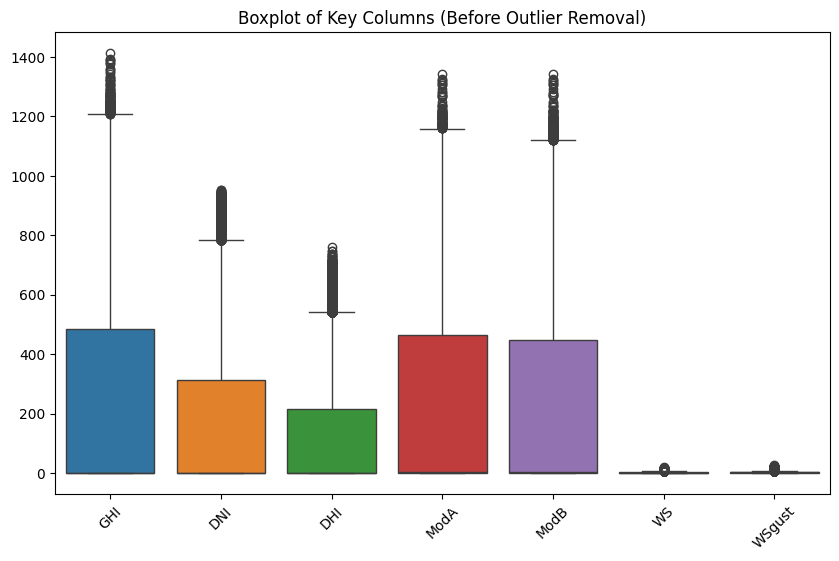

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean[key_columns])
plt.title("Boxplot of Key Columns (Before Outlier Removal)")
plt.xticks(rotation=45)
plt.show()

In [35]:
# Check outliers
from scipy import stats

# Calculate Z-scores for key columns
z_scores = df_clean[key_columns].apply(stats.zscore)

# Flag outliers (|Z| > 3)
outlier_flags = (np.abs(z_scores) > 3)
print("Number of outliers per column:")
print(outlier_flags.sum())

ModuleNotFoundError: No module named 'scipy'

In [ ]:
# Enhanced outlier treatment: winsorization + iterative Z-score capping
from scipy.stats.mstats import winsorize

def treat_outliers_enhanced(df, columns, z_threshold=3, winsor_limits=0.01):
    """Combination winsorization + Z-score approach"""
    df_out = df.copy()
    
    # First pass: Winsorize extreme values
    for col in columns:
        df_out[col] = winsorize(df_out[col], limits=[winsor_limits, winsor_limits])
    
    # Second pass: Iterative Z-score treatment
    for _ in range(3):
        for col in columns:
            z = np.abs(stats.zscore(df_out[col]))
            median = df_out[col].median()
            df_out.loc[z > z_threshold, col] = median
    
    return df_out

df_clean = treat_outliers_enhanced(df_clean, key_columns)

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean[key_columns])
plt.title("Boxplot of Key Columns (After Outlier Removal)")
plt.xticks(rotation=45)
plt.show()

In [ ]:

#Export dataset

country = "benin"  
output_path = f"../data/{country}_clean.csv"
df_clean.to_csv(output_path, index=False)